# Splines

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

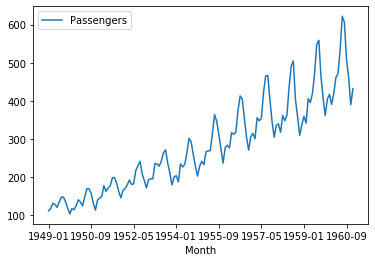

In [23]:
ap = pd.read_csv('D:/data/csv/airline_passengers.csv', header=0, index_col=0)
ap.plot();
ts = ap['Passengers']

In [24]:
# Determine inflection points 
def get_inflection_point_idxs(ts):
    ip = np.zeros(len(ts))
    for i in (range(1,len(ts)-1)):
        if(ts[i] > ts[i-1] and ts[i] > ts[i+1]):
           ip[i] = 1
        elif(ts[i] < ts[i-1] and ts[i] < ts[i+1]): 
            ip[i] = -1
    return(ip)

# Get the ts formed by only the inflection points
def getIP_ts(ts, ip, interpolate=True):
    ips = np.zeros(len(ts))
    for i in range(len(ts)):
        if(ip[i] != 0): ips[i]=ts[i]
        else: ips[i] = np.nan
    ips[0] = ts[0]
    ips[-1] = ts[-1]
    nPs = len(ips[~np.isnan(ips)])
    if(interpolate): 
        df = pd.DataFrame(ips)
        interp = df.interpolate(method='linear')
        ips = np.asarray(interp[0])
    return ips, nPs

In [25]:
ip = get_inflection_point_idxs(ts)
ip

array([ 0.,  0.,  1.,  0., -1.,  0.,  0.,  0.,  0.,  0., -1.,  1., -1.,
        0.,  1.,  0., -1.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,
        1., -1.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  1.,
       -1.,  0.,  0.,  0.,  1.,  0.,  0., -1.,  0.,  0.,  0.,  1.,  0.,
       -1.,  0.,  0.,  1.,  0.,  0., -1.,  0.,  1., -1.,  1., -1.,  0.,
        0.,  1.,  0.,  0.,  0., -1.,  0.,  1., -1.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0., -1.,  0.,  1., -1.,  1., -1.,  0.,  0.,  1.,
        0.,  0.,  0., -1.,  0.,  1., -1.,  1., -1.,  0.,  0.,  0.,  1.,
        0.,  0., -1.,  0.,  1., -1.,  1., -1.,  0.,  0.,  0.,  1.,  0.,
        0., -1.,  0.,  1., -1.,  1., -1.,  0.,  0.,  0.,  1.,  0.,  0.,
       -1.,  0.,  1., -1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0., -1.,
        0.])

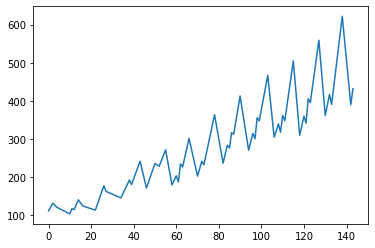

In [26]:
sp = getIP_ts(ts, ip)
plt.plot(sp[0]);